In [3]:
library(tidyverse)
library(dplyr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
#Codes for The Players Data Set:

players_data <- read_csv("data/players.csv")

#Finding out How many Observations
number_observations_players <- nrow(players_data)
number_observations_players

#Table for variables meaning and type
variables_players <- tibble::tibble(
  Variable = c("experience", "subscribe", "hashedEmail", 
               "played_hours", "name", "gender", "Age"),
  
  Meaning = c("Player’s experience/skill level",
              "Indicates if the player is a subscriber to the game's (MineCraft) newsletter",
              "Anonymized unique identifier for each player",
              "Total number of hours the player has played",
              "Player’s first name",
              "Player’s gender identity",
              "Player’s age in years"),
  
  Type = c("Categorical", "Categorical", "Categorical",
           "Quantitative", "Categorical", "Categorical", "Quantitative"))

#Percentage of players' skill levels
experience_players <- players_data |>
count(experience)|> mutate(Percent_of_Skill_Levels_Among_Players = round(n/196*100, 2)) 


#Percentage of players' are subscribed or not
subscribe_players <- players_data |> count(subscribe) |> mutate(Percent_of_Subscription_Status = round(n/196*100, 2)) 

#Count and Percentage of 
gender_players <- players_data |> count(gender) |> mutate(Percent_of_Genders = round(n/196 *100, 2))

#Summary Statistics of Variables
summary(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [5]:
#Codes for the Sessions data set
sessions_data <- read_csv("data/sessions.csv")
head(sessions_data)

#Finding out How many Observations
number_observations_sessions <- nrow(sessions_data)
number_observations_sessions

#Number of Variables and their Names
colnames(sessions_data)

#Table for Variables meaning and Type
variables_sessions <- tibble::tibble(
  Variable = c("hashedEmail", "start_time", "end_time", 
               "original_start_time", "original_end_time"),
  
  Meaning = c("Anonymized unique identifier for each player",
              "The actual recorded start time of a session", 
              "The actual recorded end time of a session", 
              "Original start timestamp (ms)", 
              "Original end timestamp (ms)"),
  
  Type = c("Categorical", "Quantitative", "Quantitative",
           "Quantitative", "Quantitative"))

summary(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535

[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

<h2> <u> (1) Data Description:</u> </h2>

<u>**Players Data Set Description:**</u>

A comma-separated-values data set including information about game players. It has 196 observations and 7 variables.

In [5]:
variables_players

Variable,Meaning,Type
<chr>,<chr>,<chr>
experience,Player’s experience/skill level,Categorical
subscribe,Indicates if the player is a subscriber to the game's (MineCraft) newsletter,Categorical
hashedEmail,Anonymized unique identifier for each player,Categorical
played_hours,Total number of hours the player has played,Quantitative
name,Player’s first name,Categorical
gender,Player’s gender identity,Categorical
Age,Player’s age in years,Quantitative


The **experience** variable includes five skill levels. The percentage and count (n) of each skill level is described below.



In [7]:
experience_players

experience,n,Percent_of_Skill_Levels_Among_Players
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


The **subscribe** variable's summary statistics is described below. The table indicates "TRUE" meaning they have subscribed and "FALSE" meaning they have not and "n" column as the count.

In [8]:
subscribe_players

subscribe,n,Percent_of_Subscription_Status
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


For **played hours**, the mean hours played among the 196 players is 5.85 hours. A possible issue with this is that hours played for the players could have outliers, being too different from the common trend in the data, which distorts the mean and could pose as an issue for linear regression models who are sensitive to outliers.

There are seven categories listed for **gender**. The count (n) and percentages of genders are listed below. The mean age of the players is 21. If used as a predictor, the "Other" and "Prefer not to say" categories can pose an issue for K-NN classification models. If the optimal K chosen includes the majority of the neighbors being one of these, an idea of what gender classifies the label may not be formed.

In [9]:
gender_players

gender,n,Percent_of_Genders
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


The players **ages** range from 9 years old to 58 years old with a mean of 21 years old. This wide range of ages could be an issue as the extreme values could be outliers and distort the mean and pose an issue for linear regression models as well.

Furthermore, a potential issue could arise if the data was collected with players personally inputting their information. The players could input wrong information, such as distorting their age due to age restrictions for the game. 

<u>**Sessions Data Set Description**</u>

A comma-separated-values data set including a list of data about individual play sessions of each game player. It has 1535 observations and 5 variables.

In [6]:
variables_sessions

Variable,Meaning,Type
<chr>,<chr>,<chr>
hashedEmail,Anonymized unique identifier for each player,Categorical
start_time,The actual recorded start time of a session,Quantitative
end_time,The actual recorded end time of a session,Quantitative
original_start_time,Original start timestamp (ms),Quantitative
original_end_time,Original end timestamp (ms),Quantitative


* Summary Statistics:
  
  After computing the duration of each session using the data, the mean is 50.86 minutes. 

In [7]:
#Computation of Mean Session Duration: 
# (code used is not from class, referenced from the "AI Overview" section when searched on Google)

#Using the clock time to calculate session duration in minutes
session_durations <- sessions_data |> mutate(
    start_time = dmy_hm(start_time),  # day-month-year hour:minute
    end_time = dmy_hm(end_time),
    session_duration_mins = as.numeric(difftime(end_time, start_time, units = "mins"))
  )

#Calculating the mean
summary(session_durations)

 hashedEmail          start_time                    
 Length:1535        Min.   :2024-04-06 09:27:00.00  
 Class :character   1st Qu.:2024-05-20 20:28:00.00  
 Mode  :character   Median :2024-06-24 02:51:00.00  
                    Mean   :2024-06-24 03:54:03.51  
                    3rd Qu.:2024-07-25 06:56:00.00  
                    Max.   :2024-09-26 06:09:00.00  
                                                    
    end_time                      original_start_time original_end_time  
 Min.   :2024-04-06 09:31:00.00   Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.:2024-05-20 21:37:00.00   1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median :2024-06-23 22:04:00.00   Median :1.719e+12   Median :1.719e+12  
 Mean   :2024-06-24 02:26:18.03   Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:2024-07-25 07:00:00.00   3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :2024-09-26 07:39:00.00   Max.   :1.727e+12   Max.   :1.727e+12  
 NA's   :2                                            NA's

* Issues in the Data:
  
  An issue with the data is that it is not tidy because the columns start_time and end_time have two values, date and time, in a single cell. 

In [8]:
sessions_data_tidy <- sessions_data |> 
separate(col = start_time, 
         into = c("start_Date", "start_time"),
         sep = " ") |>
separate(col = end_time, 
         into = c("end_date", "end_time"),
         sep = " ")
head(sessions_data_tidy)  

hashedEmail,start_Date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


* Exploration of Variables

  to be finished...

<h2> <u> (2) Questions </u> </h2>

**Chosen Broad question**: What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various players?

**Specific question**: Can age and total played hours predict whether or not a player subscribes to a game-related newsletter?

From the players data set, the variables "Age" and "played_hours" as our predictors and the "subscribe" column's values as our labels can be used to form a K-NN classification model to predict whether we get the values "TRUE" or "FALSE", indicating if a player has subscribed or not subscribed to the newsletter, respectively. 

Classification is categorical, therefore, we need to change our label to have values with the data type factor using the as_factor() function. Otherwise, the players data set is already tidy because each row contains one observation, each column one variable, and each value one cell.

<h2> <u>(3) Exploratory Data Analysis and Visualization </u> </h2>


In [10]:
players_data <- read_csv("data/players.csv")
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<h3>Wrangling:</h3>

* Converting the label into a factor data type:

In [11]:
players_data <- players_data |> 
mutate(subscribe = as_factor(subscribe)) 

<h3>Mean of Quantitative Variables in the Players Data Set:</h3>

| Quantitative Variable    | Savings |
| -------------------------| ------- |
| Played Hours             | 5.85    |
| Age in Years             | 21.14   |



<h3>Exploratory Visualizations:</h3>

**1) Exploring How Age and Played Hours Affects Subscription Status**

Based on the plot below, younger players (most concentrated at 10-30 years old) tend to play more hours and are more likely to subscribe, while older players tend to play fewer hours and are less likely to subscribe.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


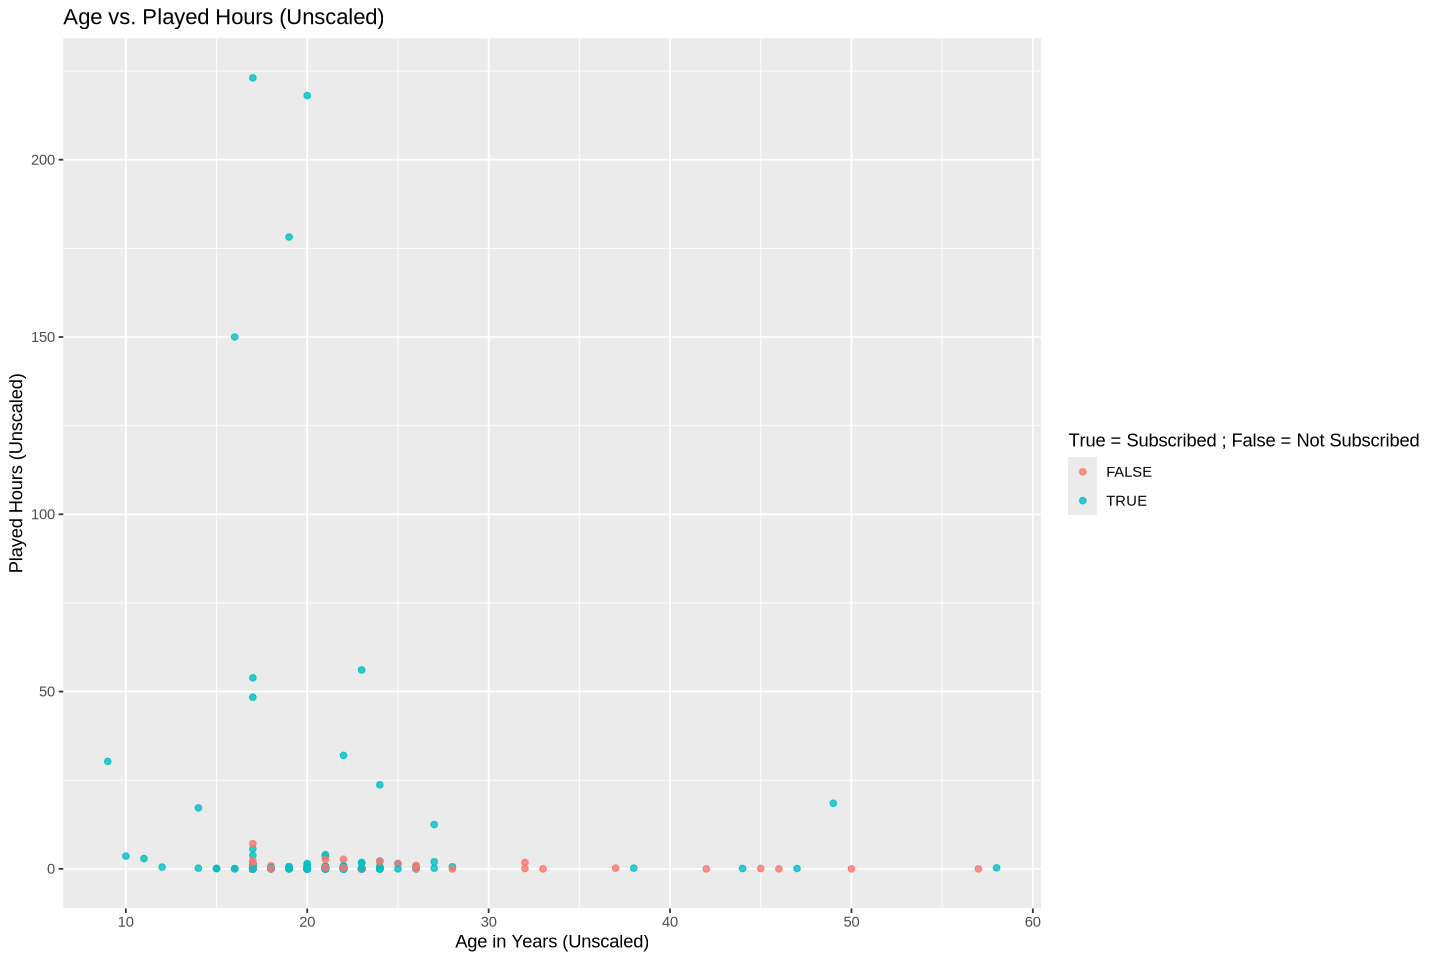

In [12]:
options(repr.plot.width = 12, repr.plot.height = 8)

age_vs_playedhours <- players_data |>
ggplot( aes(x= Age, y= played_hours, color = subscribe) ) +
geom_point(alpha = 0.8)+
labs(x= "Age in Years (Unscaled)", y= "Played Hours (Unscaled)", color = "True = Subscribed ; False = Not Subscribed" ) +
ggtitle("Age vs. Played Hours (Unscaled)")

age_vs_playedhours

The same is true when we standardize the age and played hours.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


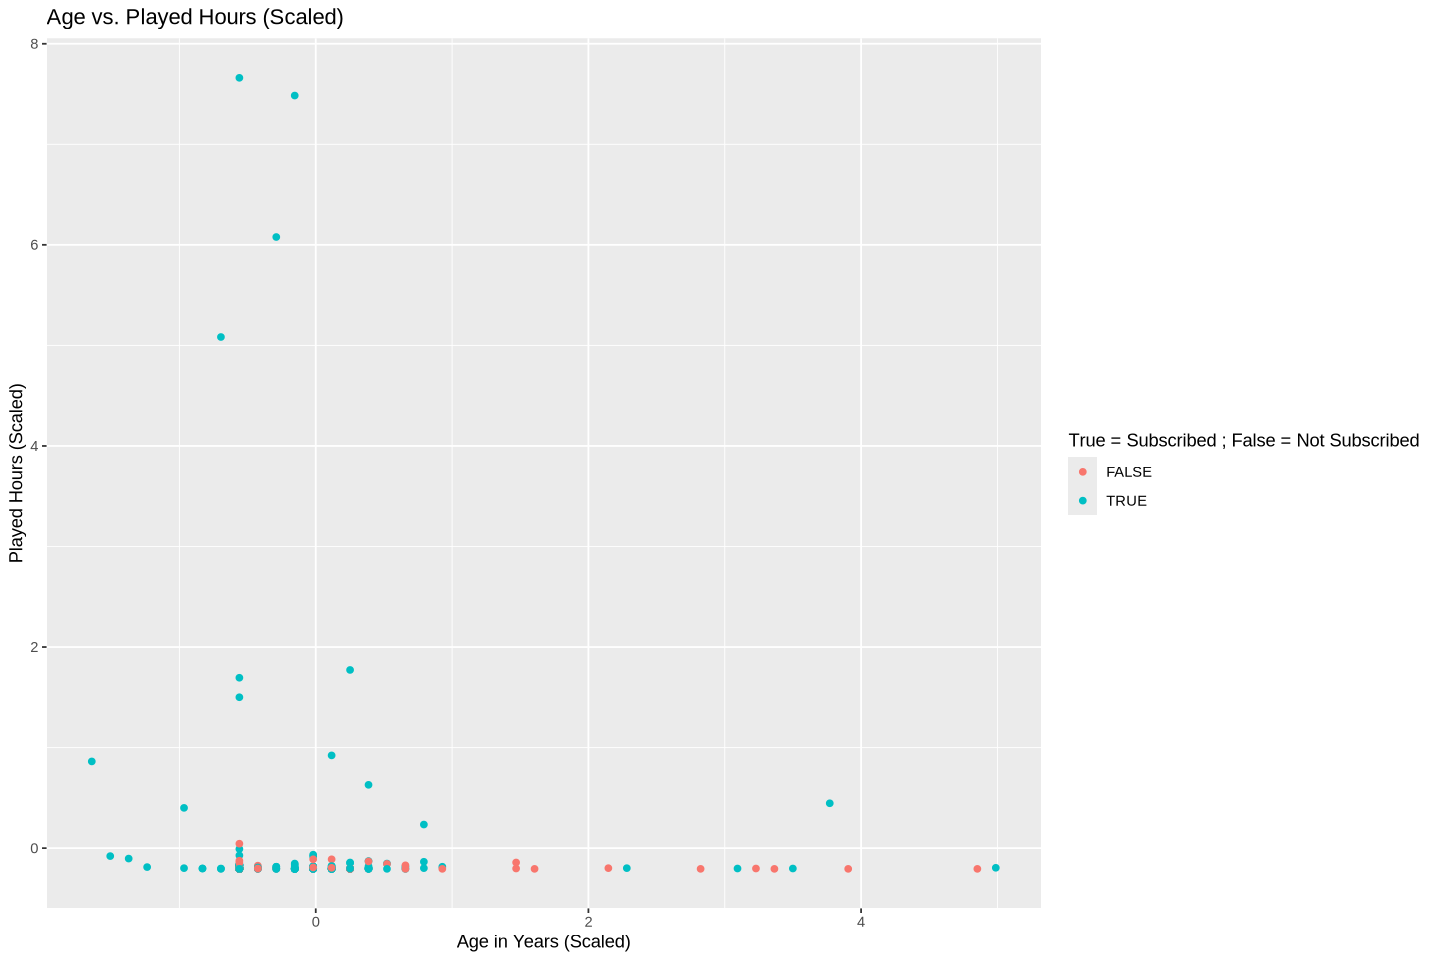

In [13]:
# Scaled one:
options(repr.plot.width = 12, repr.plot.height = 8)

SE_recipe <- recipe(subscribe ~ Age + played_hours, data = players_data)|>
step_scale(all_predictors())|>
step_center(all_predictors())|>
prep()

scaled_players <- bake(SE_recipe, players_data)

Sage_vs_playedhours <- scaled_players |>
ggplot( aes(x= Age, y= played_hours, color = subscribe) ) +
geom_point()+
labs(x= "Age in Years (Scaled)", y= "Played Hours (Scaled)", color = "True = Subscribed ; False = Not Subscribed" ) +
ggtitle("Age vs. Played Hours (Scaled)")

Sage_vs_playedhours


**2) Exploring Age with Subscription Status**

If we explore age with subscription status independent of played hours, we can see that the same is true, older players (above 30 years old) usually don't subscribe.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


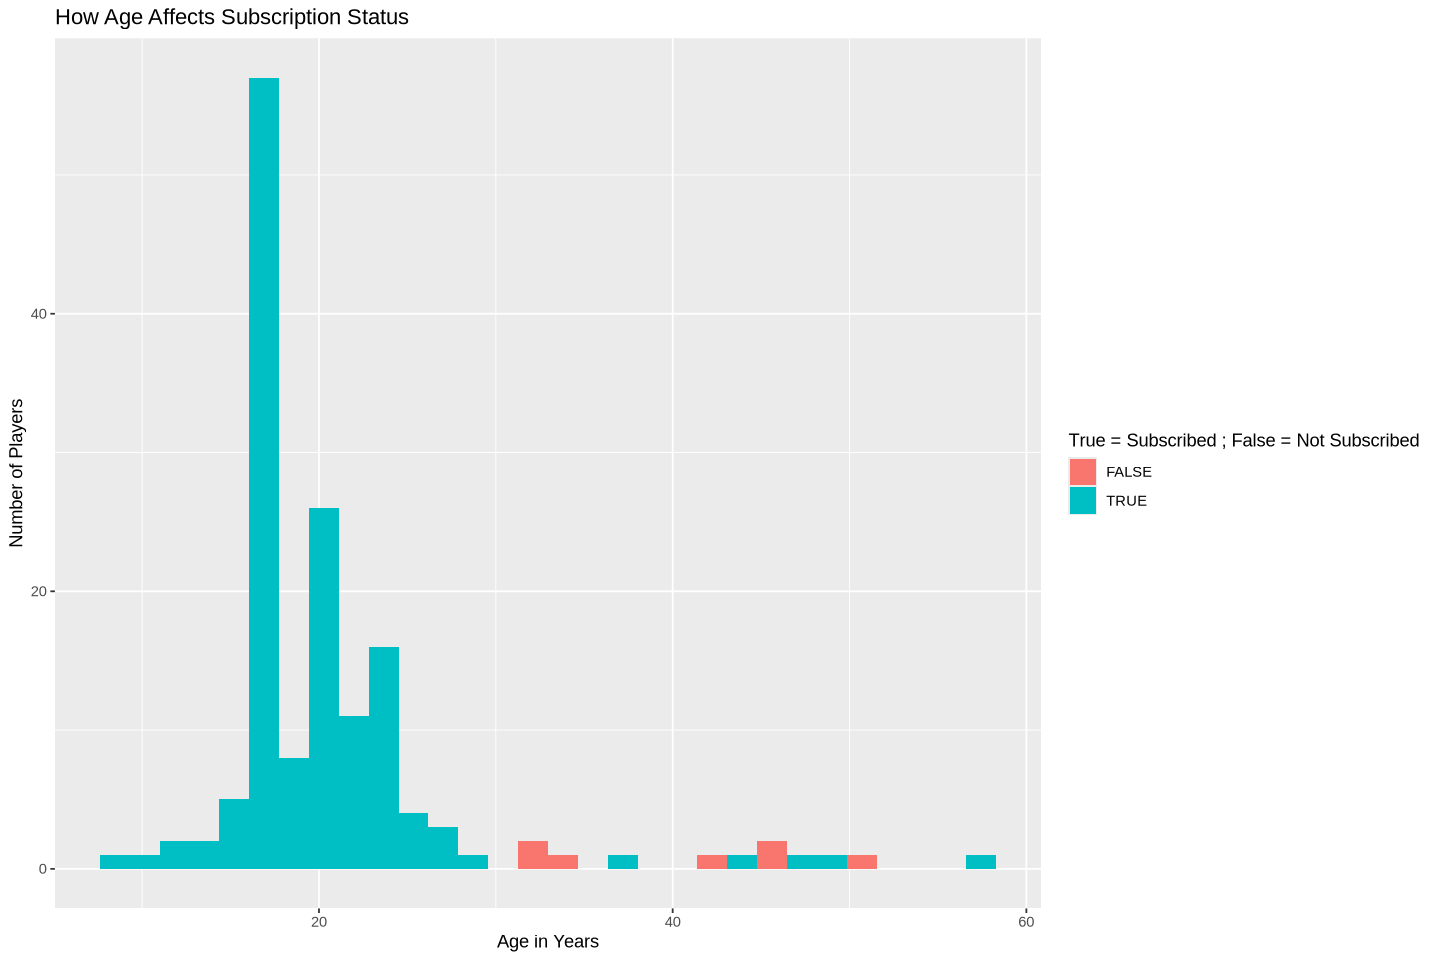

In [14]:
options(repr.plot.width = 12, repr.plot.height = 8)

age_vs_subscribe <- players_data |>
ggplot( aes(x= Age, fill = subscribe) ) +
geom_histogram(position = "identity")+
labs(x= "Age in Years", y = "Number of Players", fill = "True = Subscribed ; False = Not Subscribed") +
ggtitle("How Age Affects Subscription Status")

age_vs_subscribe


**3) Exploring Played Hours with Subscription Status**

The same statement, players who played fewer hours tend not to subscribe to the game newsletter, can be said if we explore played hours and subscription status independent of age. 

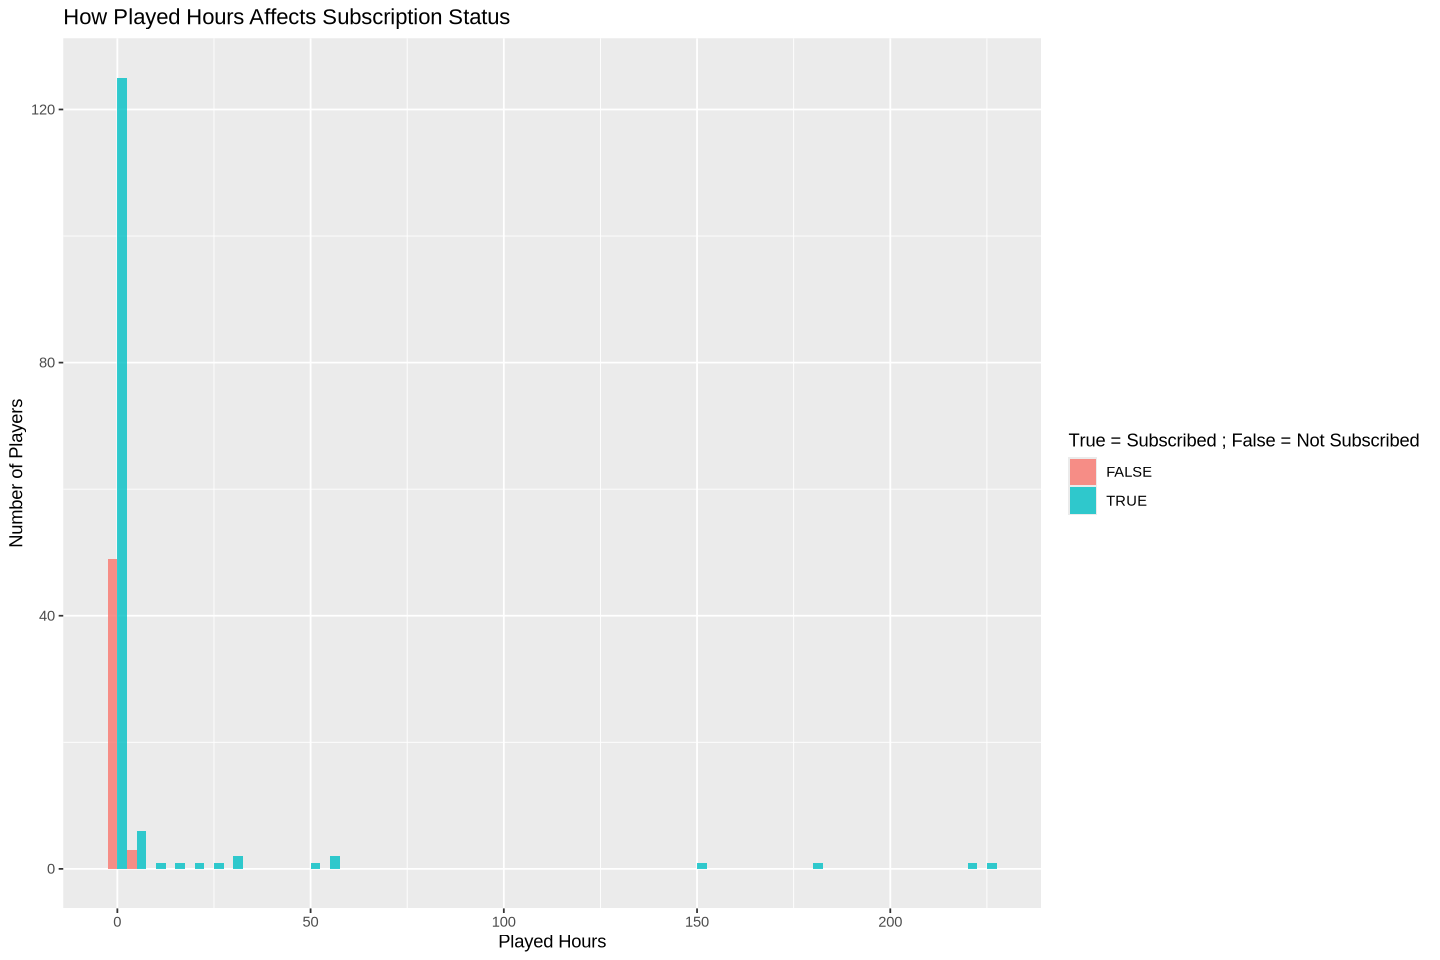

In [15]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(players_data, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(binwidth = 5,  position = "dodge", alpha = 0.8) +
  labs(title = "How Played Hours Affects Subscription Status", x = "Played Hours", y = "Number of Players", fill = "True = Subscribed ; False = Not Subscribed") 
  

**4) Exploring Played Hours, Experience, and Subscription Status**

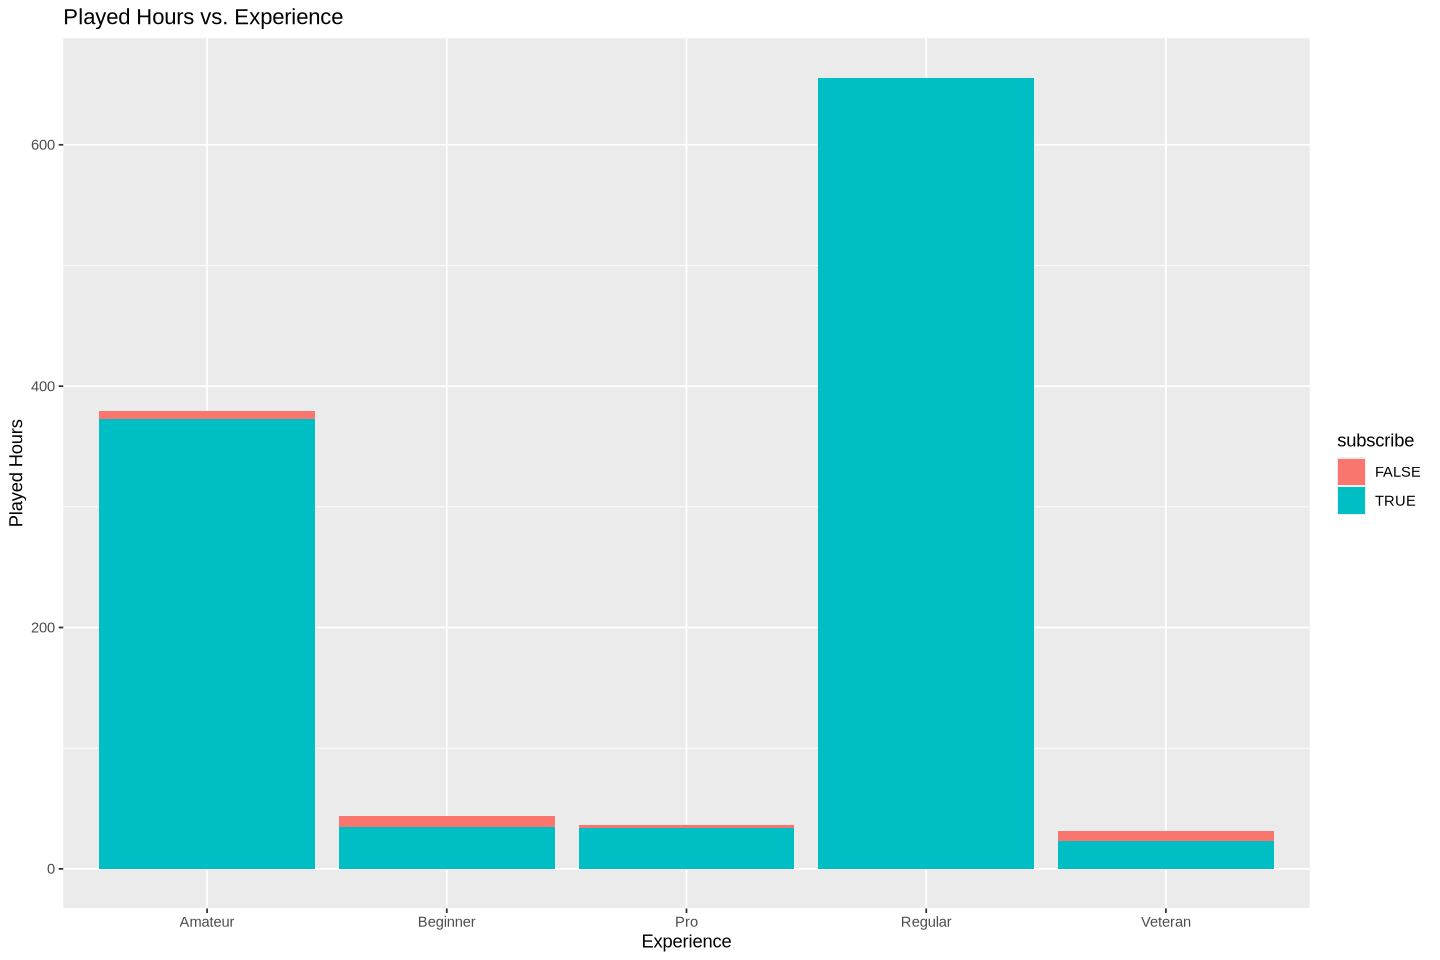

In [16]:
ggplot(players_data, aes(x = experience, y = played_hours, fill = subscribe)) +
  geom_bar(stat="identity") +
  labs(title = "Played Hours vs. Experience", x = "Experience", y = "Played Hours") 
  